# SJSU MSDS 255 DL, Spring 2024
Homework 04: Transfer Learning and Bounding Boxes and YOLOV8

Git: https://github.com/jrgosalvez/data255_DL

<b>NOTE:</b> YOLOv8 relies on PyTorch as its deep learning framework. NVIDIA NGC Catalog offers additional GPU optimized frameworks for alternative transfer learning models, frameworks, and containers (e.g. NeMO).

#### Step 1:
- Collect a source video. 
- YOLO8 accepts the following video formats: .asf, .avi, .gif, .m4v, .mkv, .mov, .mp4, .mpeg, .mpg, .ts, .wmv, .webm.
- iphone video creates .mp4 videos; I created 5-10 sec street videos and saved them locally.
- YOLO8 can classify, detect, and or segment with nano, small, medium, large, or huge pre-trained models; I use small detection for this experiment

#### Steps 2 & 3: 
Conduct inference on video, frame by frame, drawing bounding boxes around detected objects (specifically vehicles) and output a video of the object detection results.

In [1]:
# check mac systems for GPU
import torch
print(torch.backends.mps.is_available())   # check for Mac M1 GPU

False


In [2]:
# import openCV, numpy, and ultralytics YOLO8

import cv2
from ultralytics import YOLO
import numpy as np

## Part 2 

### Fine Tune Object Detection from 10 Custom IMAGES with YOLO8 Transfer Learning

Source: <br> 
- https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly
- https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/
- https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
- https://medium.com/@pat.x.guillen/a-step-by-step-guide-to-running-yolov8-on-windows-122cb586b567

Repeat Steps 1-3 but for images on 10 images of the Roboflow squid-bat-butterfly datasets.

#### Prep custom Roboflow squid-bat-butterfly dataset

Use roboflow to prepare dataset and annotate. <b>NOTE:</b> can do it online with Roboflow workflow low-code workflow tools or 'Custom Train and Upload' to get YOLOv8 code snippet to do manually.

In [3]:
from IPython import display
display.clear_output()

from IPython.display import display, Image

#### Get Custom Dataset from Roboflow

In [4]:
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='Part_2_Jorge_Gosalvez_255_boston_dog.jpeg' save=True

Ultralytics YOLOv8.1.17 🚀 Python-3.11.5 torch-2.2.0 CPU (Intel Core(TM) i5-8210Y 1.60GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Part_2_Jorge_Gosalvez_255_boston_dog.jpeg: 480x640 1 person, 1 dog, 341.9ms
Speed: 3.2ms preprocess, 341.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


<div class="alert alert-block alert-info">
<b>Tip:</b> The first time you run the prediction train and predict folders are created. Subsequent runs append a # to the folder. Be sure to update the file path correctly to fetch the correct results.
</div>

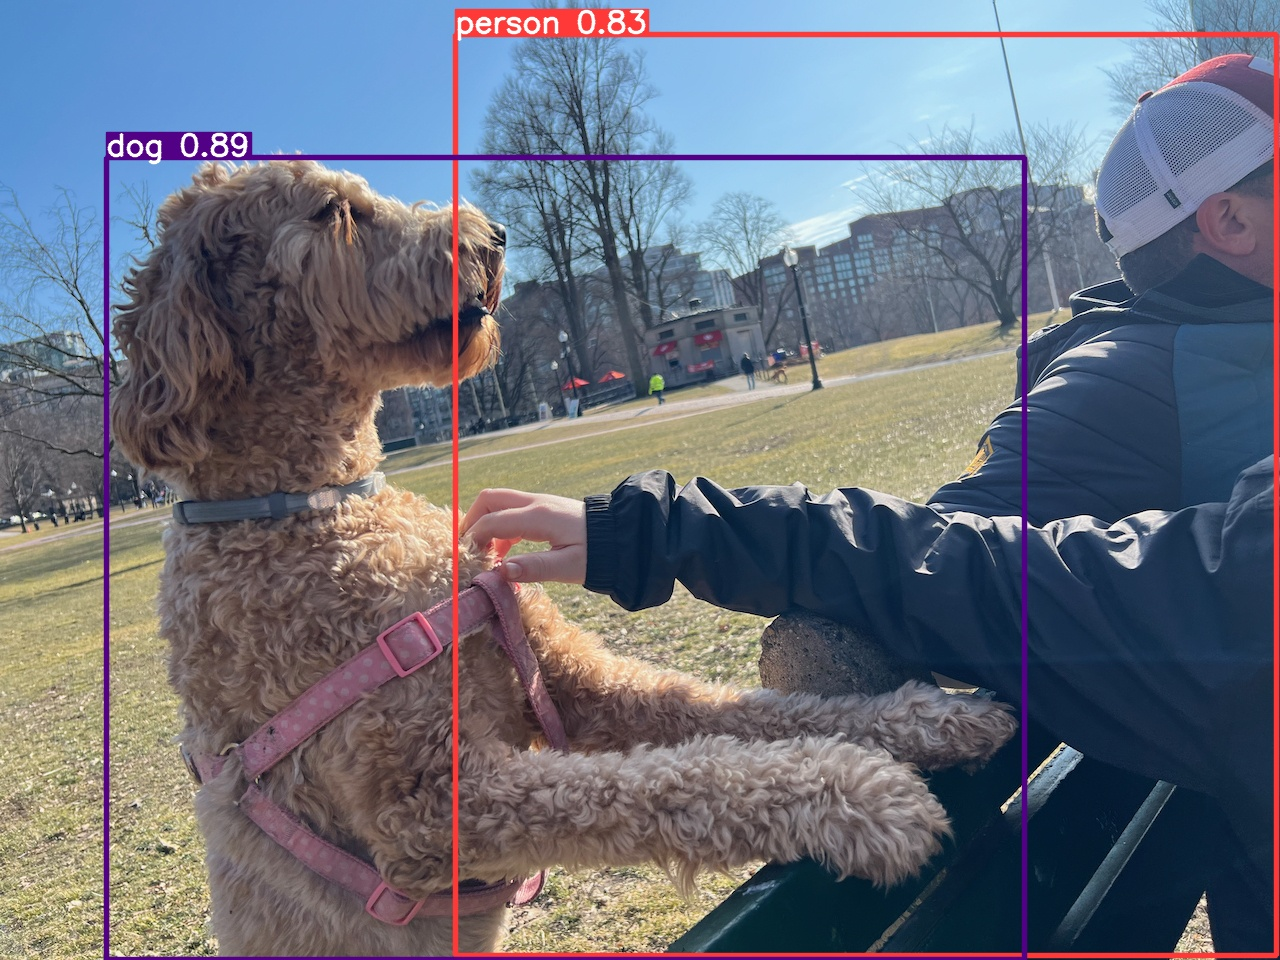

In [5]:
Image(filename='runs/detect/predict/Part_2_Jorge_Gosalvez_255_boston_dog.jpeg', height=400)

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ytVnstTGTkiOHxfkYXsM")
project = rf.workspace("sjsu-dl-255-squidbatbutterfly").project("transfer-learning-and-fine-tune")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.17, to fix: `pip install ultralytics==8.0.196`


#### Custom Train on YOLOv8 using Roboflow prepared squid-bat-butterfly dataset

<div class="alert alert-block alert-danger">
<b>NOTE:</b> Roboflow outputs a data.location path defaulted to your project name; however, it repeats it twice in the data.yaml file and should be corrected to match the ../test/images path as to avoid duplicating the dataset folder name twice in the data.yaml file for train and val paths to data.
</div>

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=12 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.17 🚀 Python-3.11.5 torch-2.2.0 CPU (Intel Core(TM) i5-8210Y 1.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Transfer-Learning-and-Fine-Tune-2/data.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualiz

In [8]:
!ls runs/detect/train

F1_curve.png
PR_curve.png
P_curve.png
R_curve.png
args.yaml
confusion_matrix.png
confusion_matrix_normalized.png
events.out.tfevents.1708901625.Ricks-MacBook-Air-2.local.51669.0
labels.jpg
labels_correlogram.jpg
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch16.jpg
train_batch17.jpg
train_batch18.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


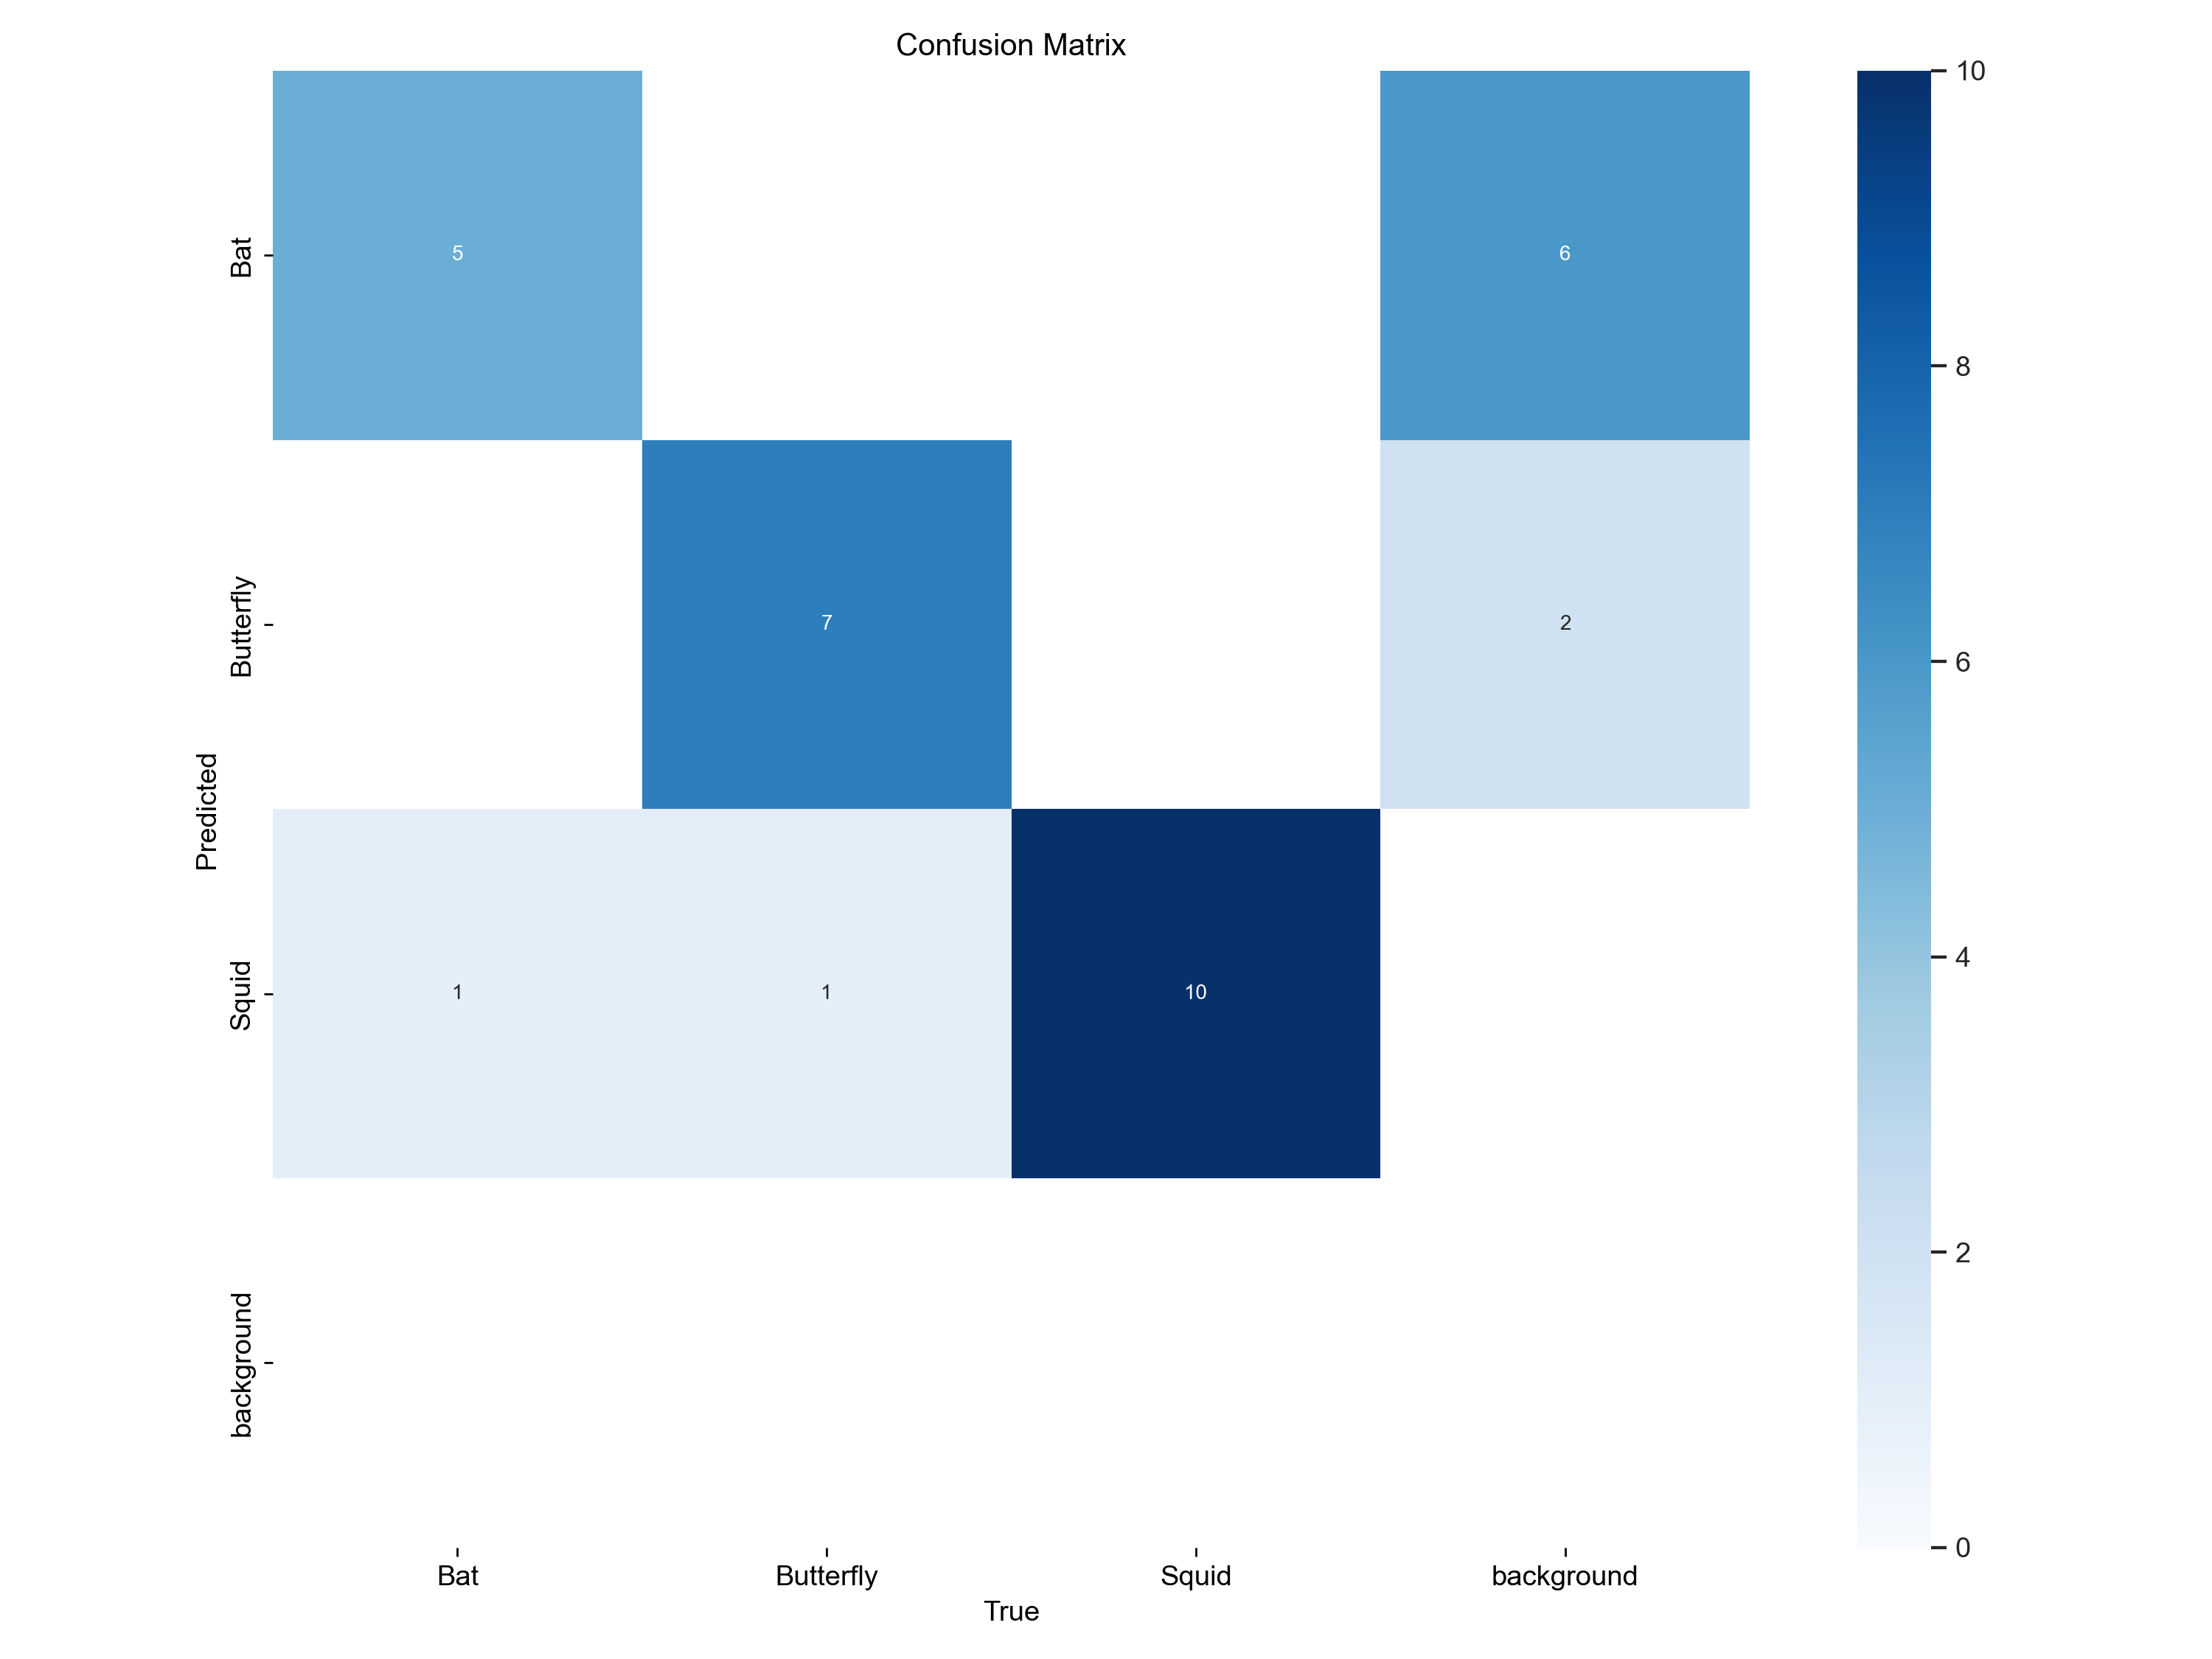

In [9]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=800)

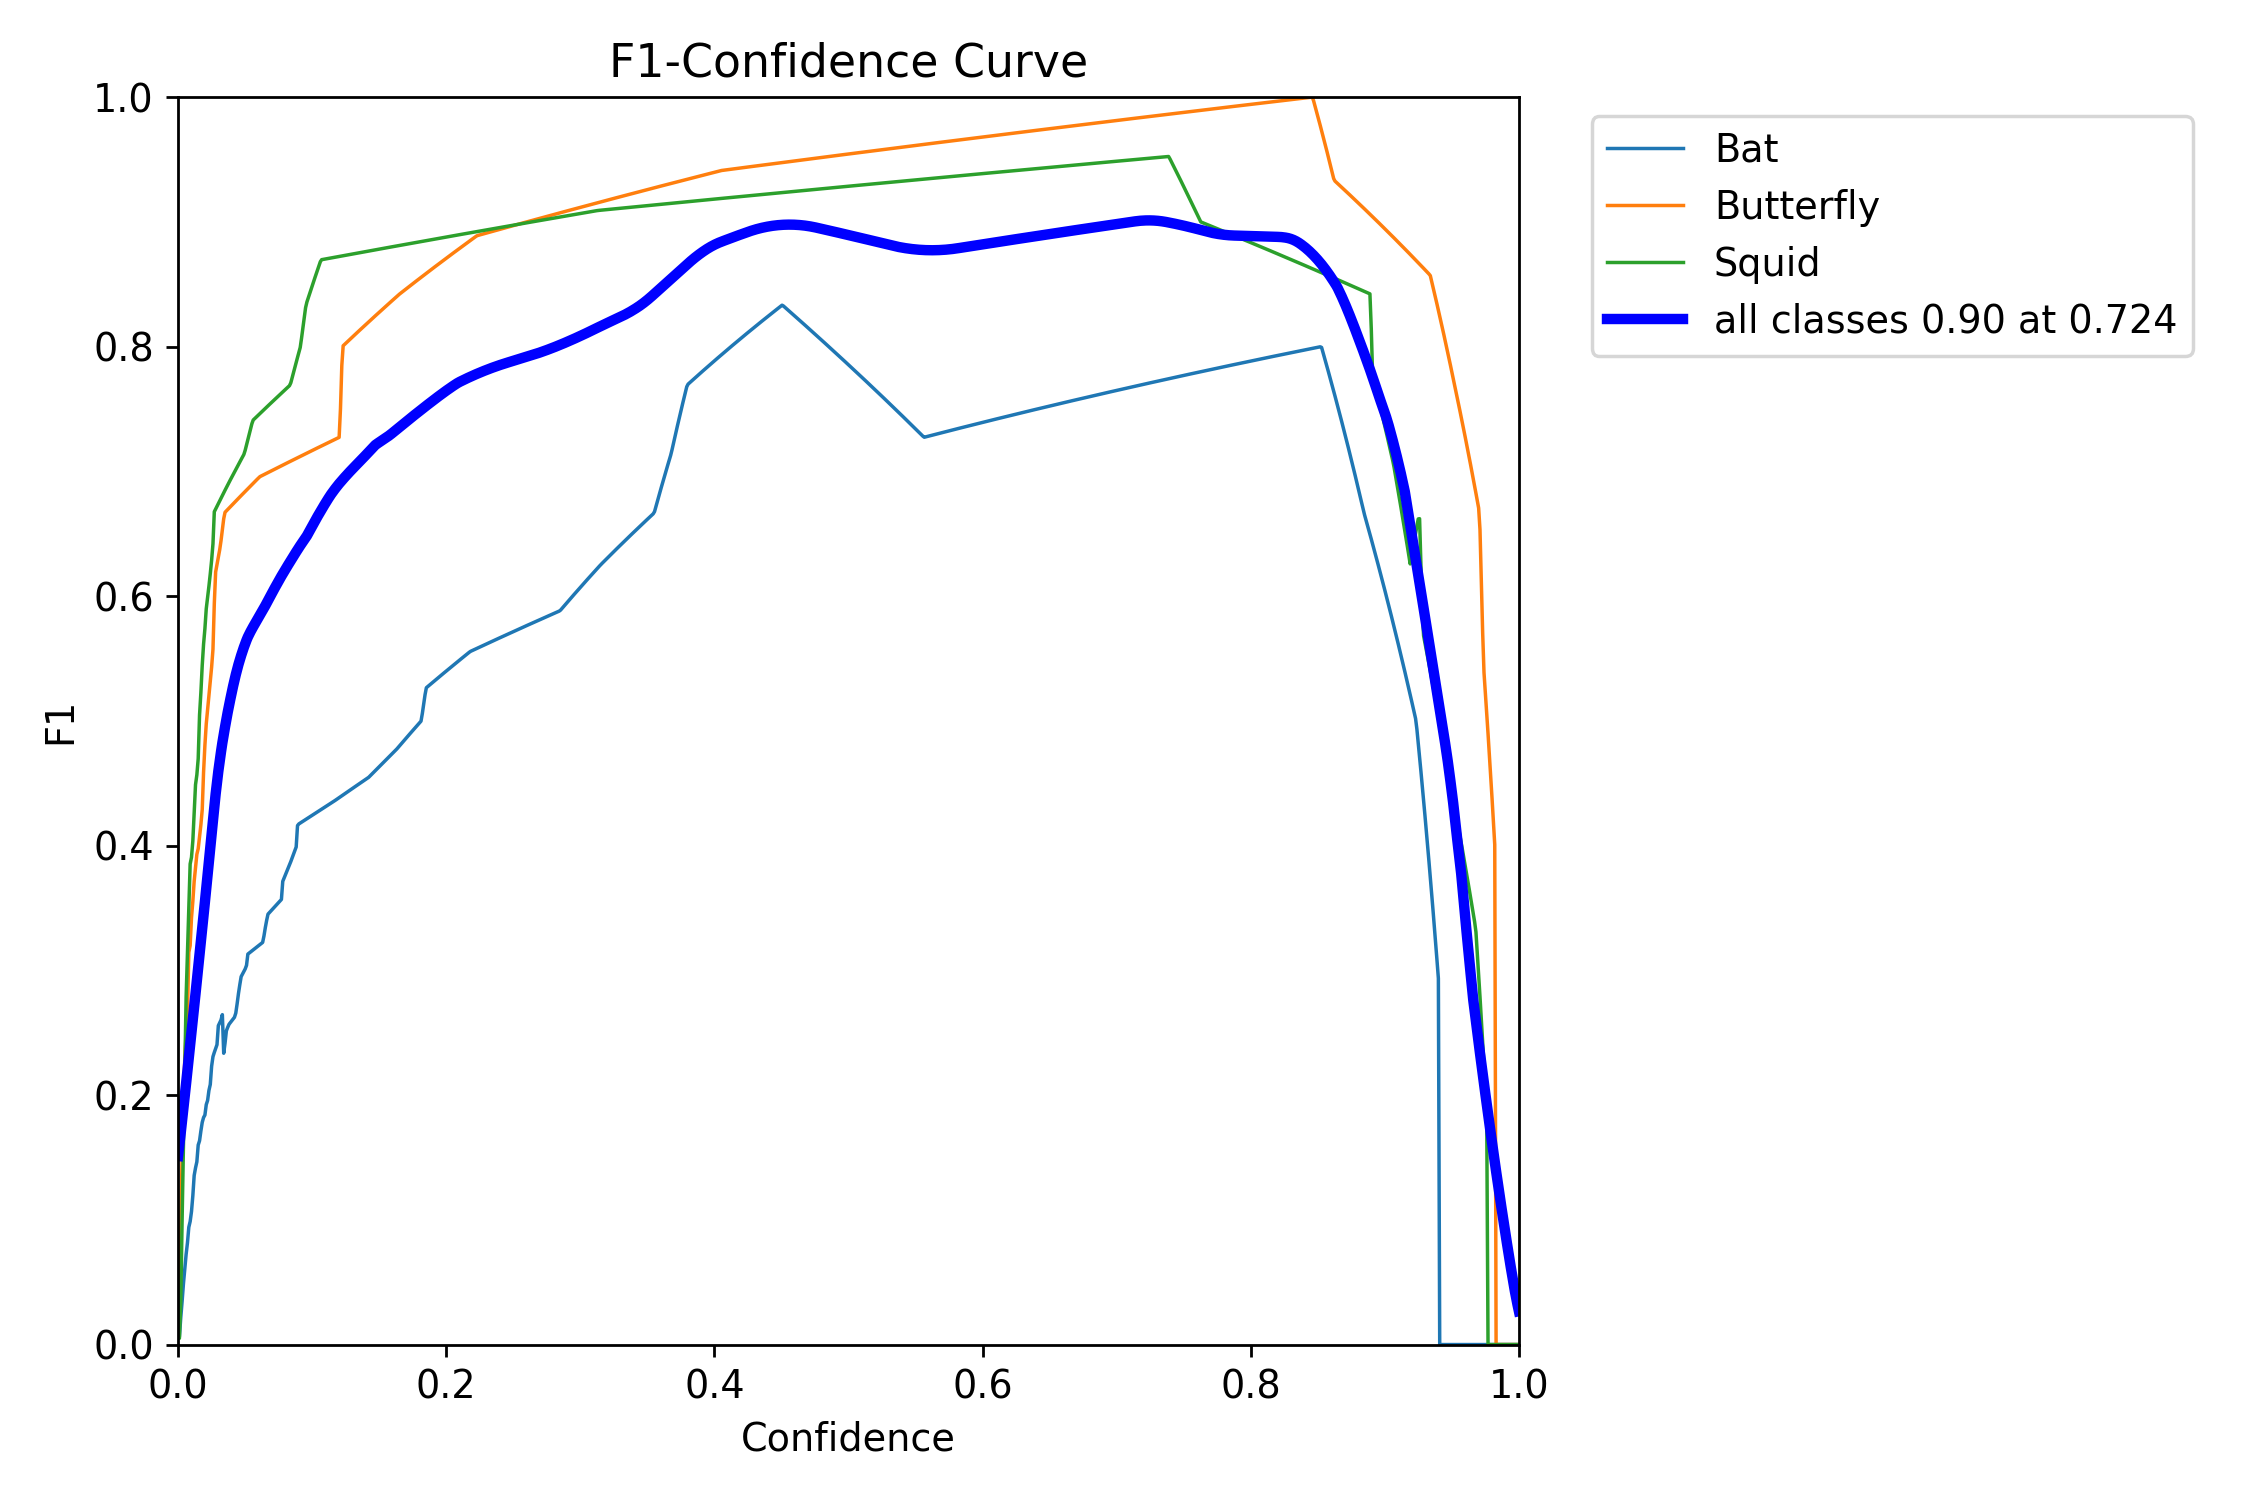

In [10]:
Image(filename=f'runs/detect/train/F1_curve.png', width=800)

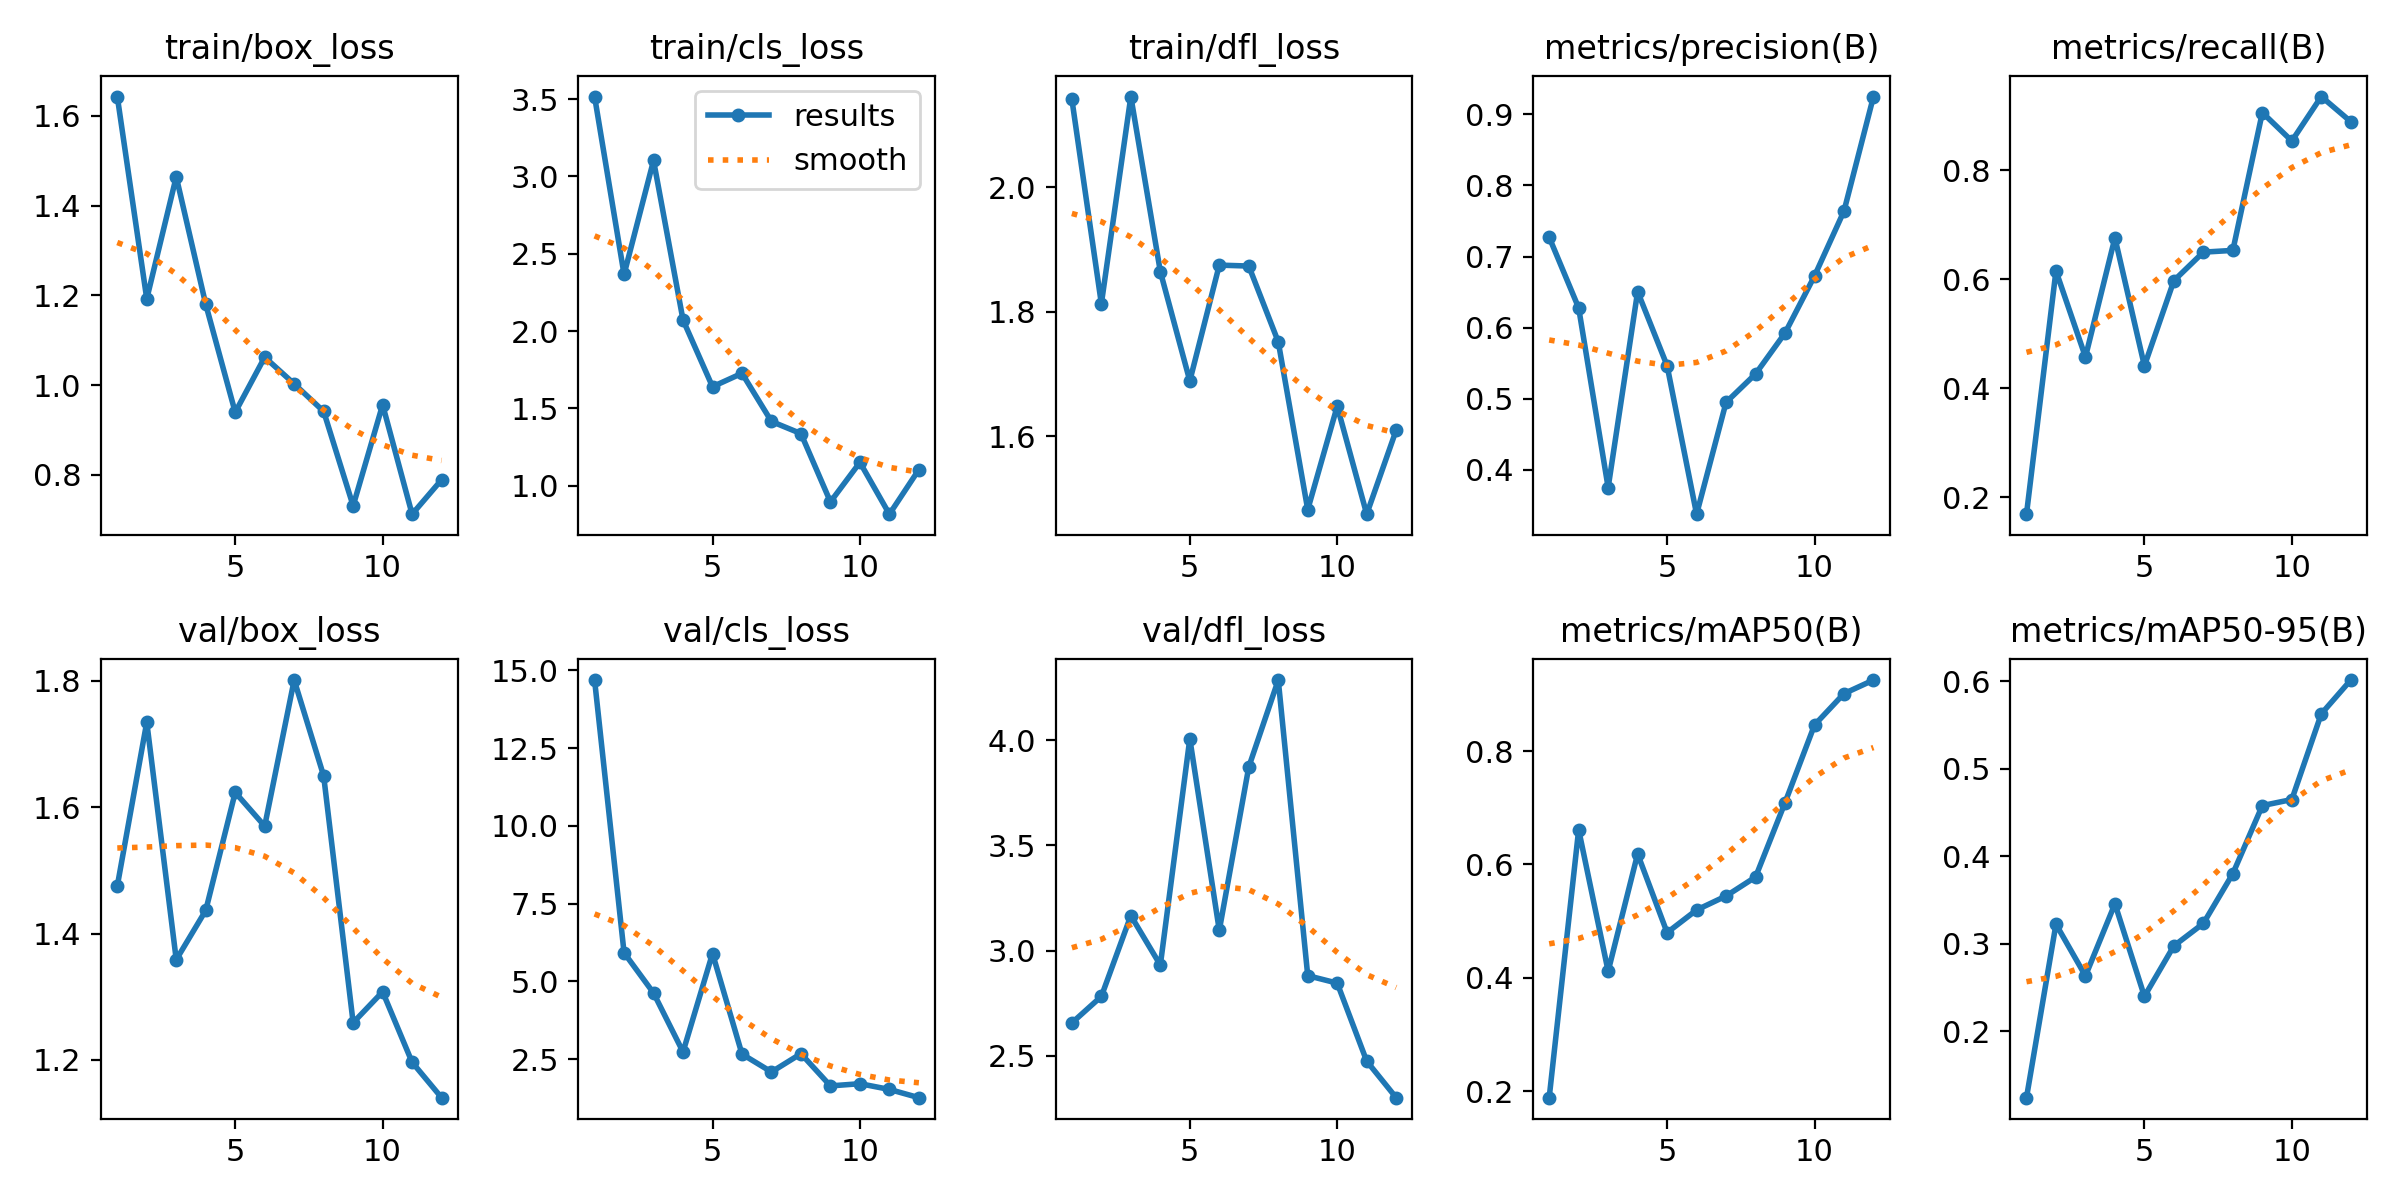

In [11]:
Image(filename=f'runs/detect/train/results.png', width=800)

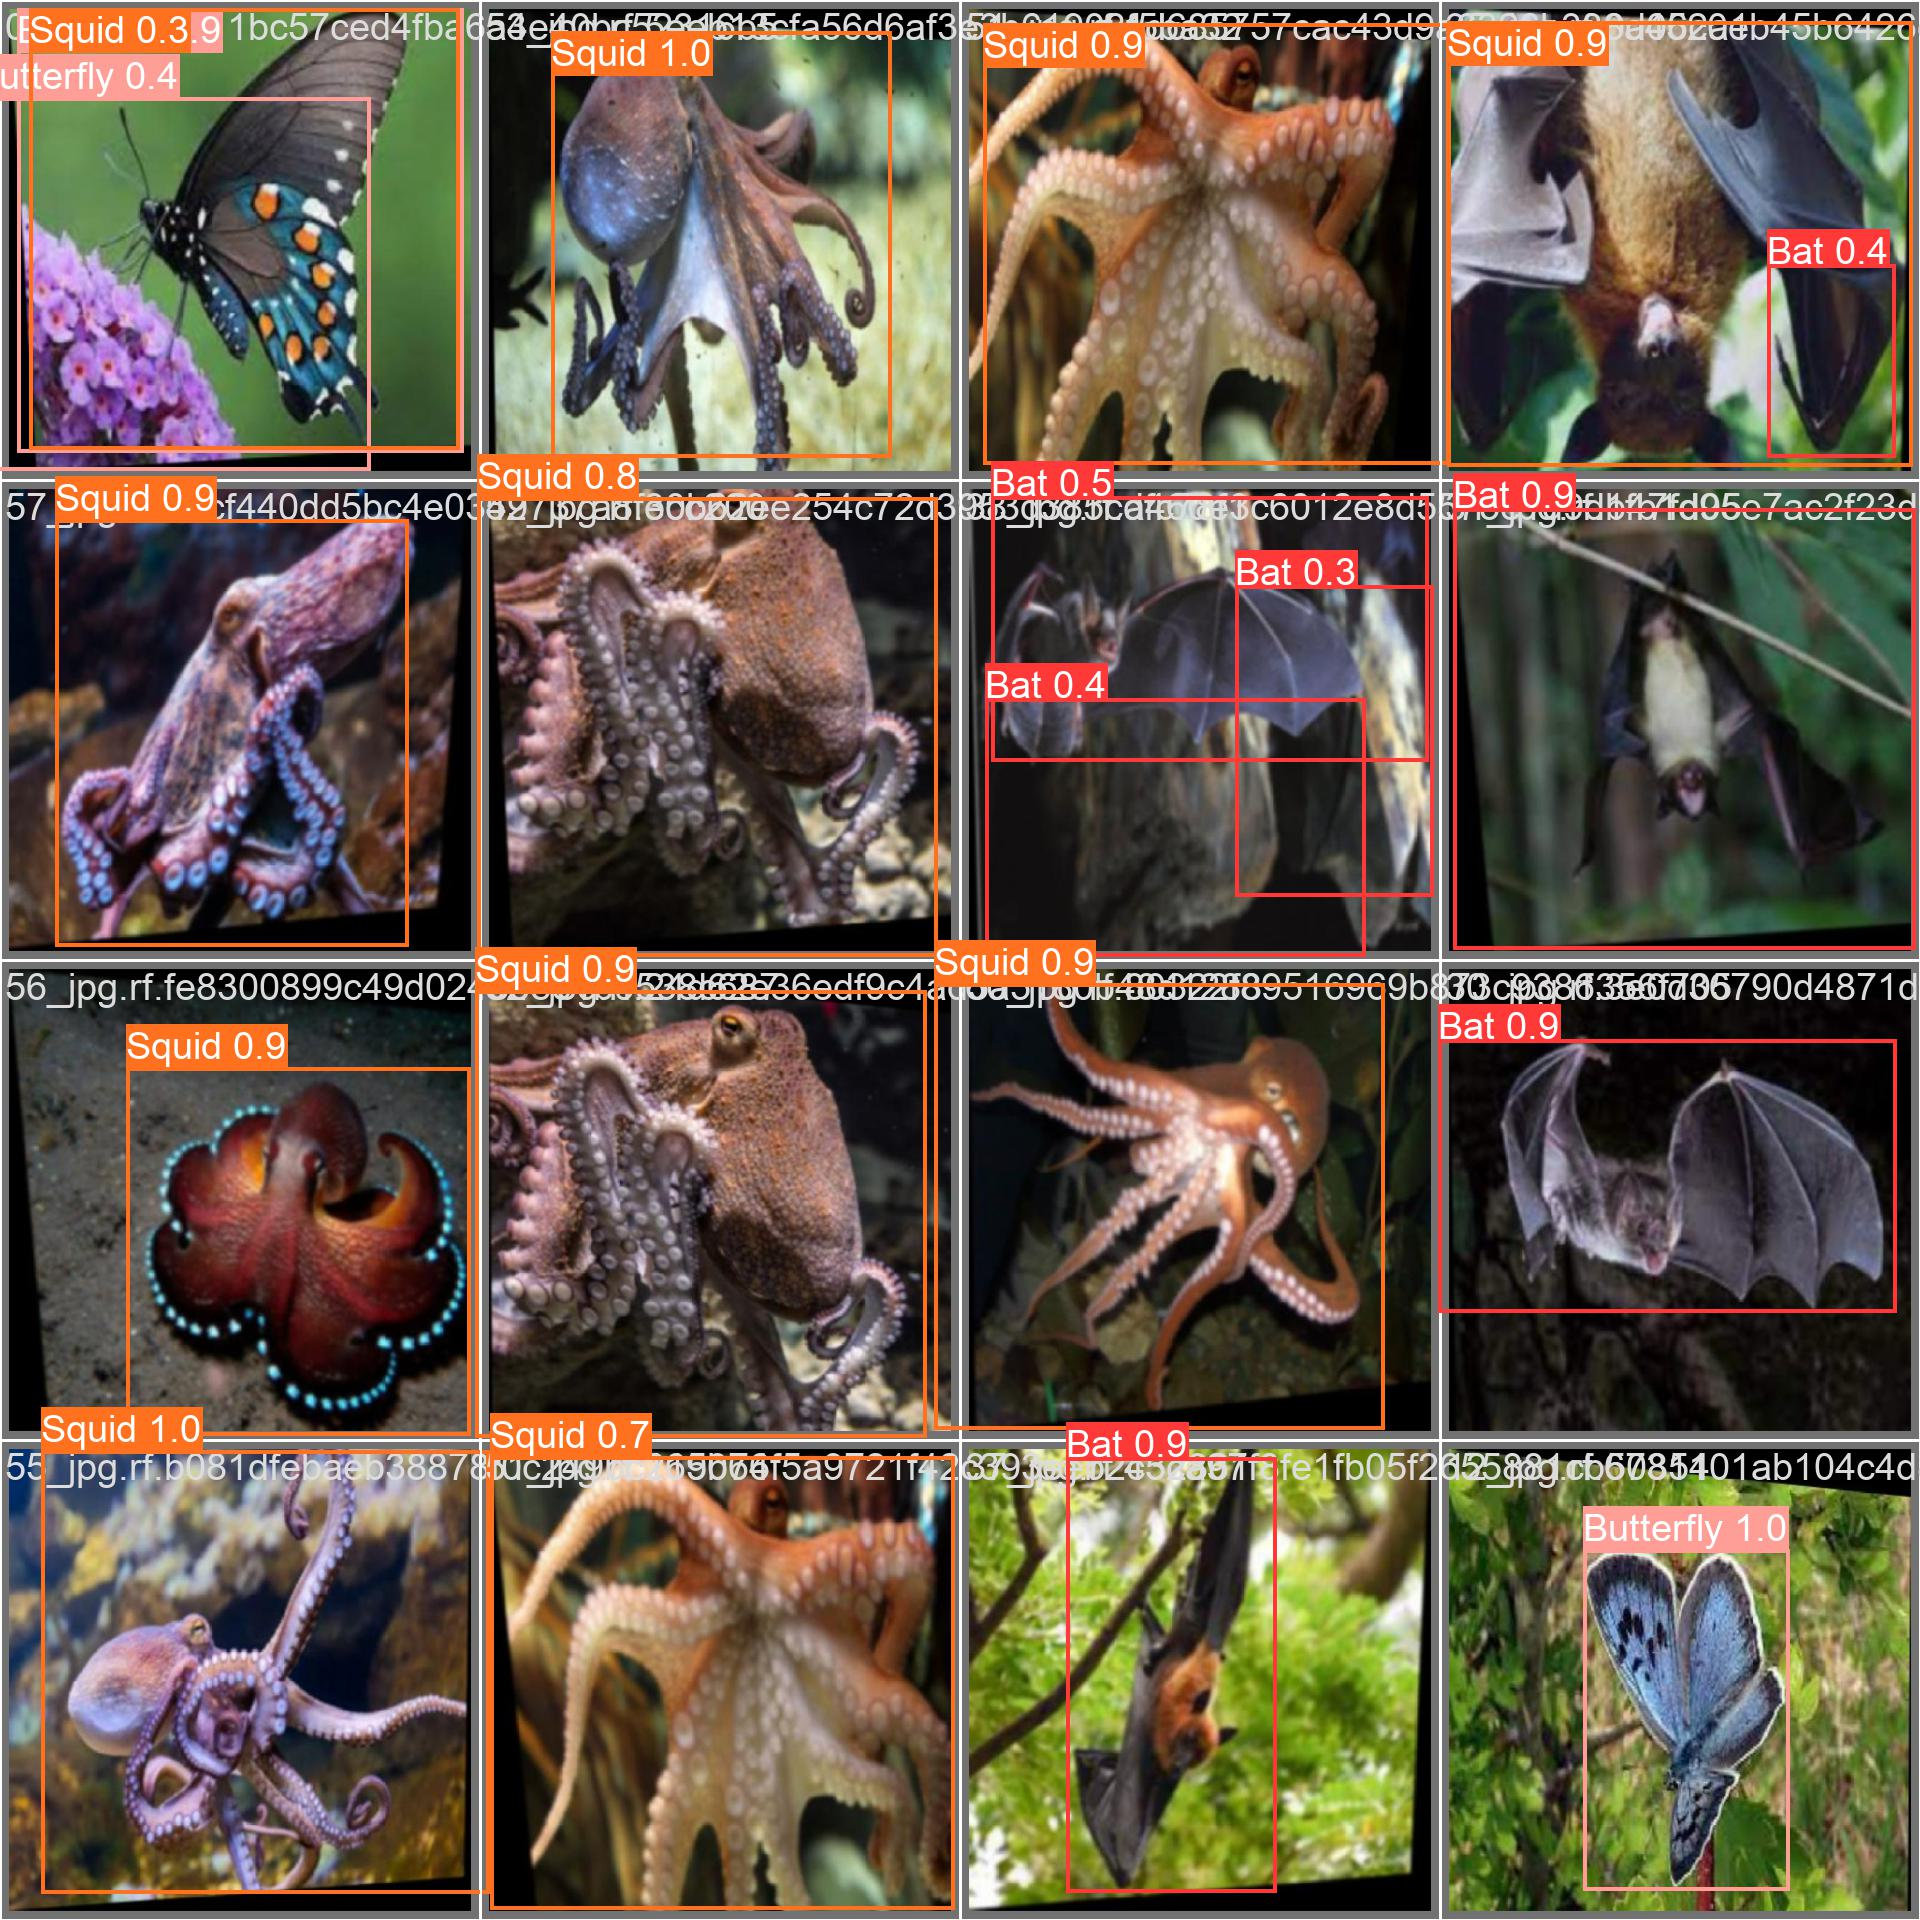

In [12]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=800)

In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.17 🚀 Python-3.11.5 torch-2.2.0 CPU (Intel Core(TM) i5-8210Y 1.60GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DAT
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         23         24      0.924      0.889      0.925      0.601
                   Bat         23          6      0.903      0.667      0.831      0.443
             Butterfly         23          8      0.965          1      0.995      0.515
                 Squid         23         10      0.904          1       0.95      0.845
Speed: 7.7ms preprocess, 969.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.1.17 🚀 Python-3.11.5 torch-2.2.0 CPU (Intel Core(TM) i5-8210Y 1.60GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Transfer-Learning-and-Fine-Tune-2/test/images/01_jpg.rf.e1744935bf7e290862ee065b355510b4.jpg: 800x800 1 Butterfly, 880.2ms
image 2/10 /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Transfer-Learning-and-Fine-Tune-2/test/images/06_jpg.rf.a9c6818c8b48a459d4ae3c5cb7491072.jpg: 800x800 1 Butterfly, 632.8ms
image 3/10 /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Transfer-Learning-and-Fine-Tune-2/test/images/09_jpg.rf.df81948543b774558651887799d18a32.jpg: 800x800 3 Butterflys, 718.9ms
image 4/10 /Users/gosalvez/Desktop/Git/python_practice/python_practice/HW/DATA255_DL_SPRING2024/HW4/Transfer-Learning-and-Fine-Tune-2/test/images/10_jpg.rf.4b

### Review results

In [15]:
import glob
from IPython.display import display, HTML
from PIL import Image

# Get list of image paths
image_paths = glob.glob(f'runs/detect/predict2/*.jpg')[:10]

# Create HTML table
table_html = "<table><tr>"

# Loop through image paths
for i, image_path in enumerate(image_paths):
    # Open image
    img = Image.open(image_path)
    
    # Resize image to fit in table
    img.thumbnail((400, 400))
    
    # Add image to table
    table_html += f"<td><img src='{image_path}' width='400'/></td>"
    
    # Break to next row after every 2 images
    if (i + 1) % 5 == 0:
        table_html += "</tr><tr>"
    
table_html += "</tr></table>"

# Display table
display(HTML(table_html))

,,,,
,,,,


#### Ready to Deploy Your Trained Model
- If satisfied, BINGO! You now have trained weights in the runs/detect/train/weights/best.pt trained model that can be used for inference in web apps by deploying!
- Can deploy locally for local development and use or on hosted infrastructured, such as AWS, Azure, or GCS, Roboflow, etc